In [1]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import glob
import shutil

import matplotlib.pyplot as plt
from cartopy import crs as ccrs

plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 17})

# 1. preprocess

In [4]:
files = sorted(glob.glob('tmp_data/*_pv_*.nc'))
files = [c for c in files if np.float64(c.split('_')[-1].replace('.nc',''))<=66.5]
for file in files:
    nname = file.replace('tmp_data', 'tmp_data1')
    if os.path.exists(nname):
        continue
    
    mdata = xr.open_dataset(file, chunks='auto')
    mdata_day = mdata.resample(time='1D').mean('time')
    
    print(nname)
    mdata_day.to_netcdf(file.replace('tmp_data', 'tmp_data1'), encoding={'pv': dict(zlib=True, complevel=5)})

tmp_data1/era5_pv_0.0.nc


In [6]:
mdata_day = xr.open_mfdataset(sorted(glob.glob('tmp_data1/*_pv_*.nc')))
#mdata_day.isel(time=0)['pv'].plot()

mdata_day.to_netcdf('era5_pv_tilt15_day.nc', encoding={'pv': dict(zlib=True, complevel=5)})

In [7]:
mdata_day = xr.open_dataset('era5_pv_tilt15_day.nc', chunks='auto')
mdata_mth = mdata_day.groupby('time.month').sum('time') 
mdata_mth = mdata_mth*24/1000
display(mdata_mth)

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 532, month: 12)
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -66.5 -66.25 -66.0 -65.75 ... 65.5 65.75 66.25 66.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pv       (month, lat, lon) float64 dask.array<chunksize=(1, 133, 480), meta=np.ndarray>

In [8]:
mdata_mth.to_netcdf('era5_pv_tilt15_mthSum.nc', encoding={'pv': dict(zlib=True, complevel=5)})

# 2. Plot

In [9]:
world = gpd.read_file('TM_WORLD_BORDERS-0.3.zip')

In [10]:
mdata_mth = xr.open_dataset('era5_pv_tilt15_mthSum.nc')

<Axes: title={'center': 'month = 8'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

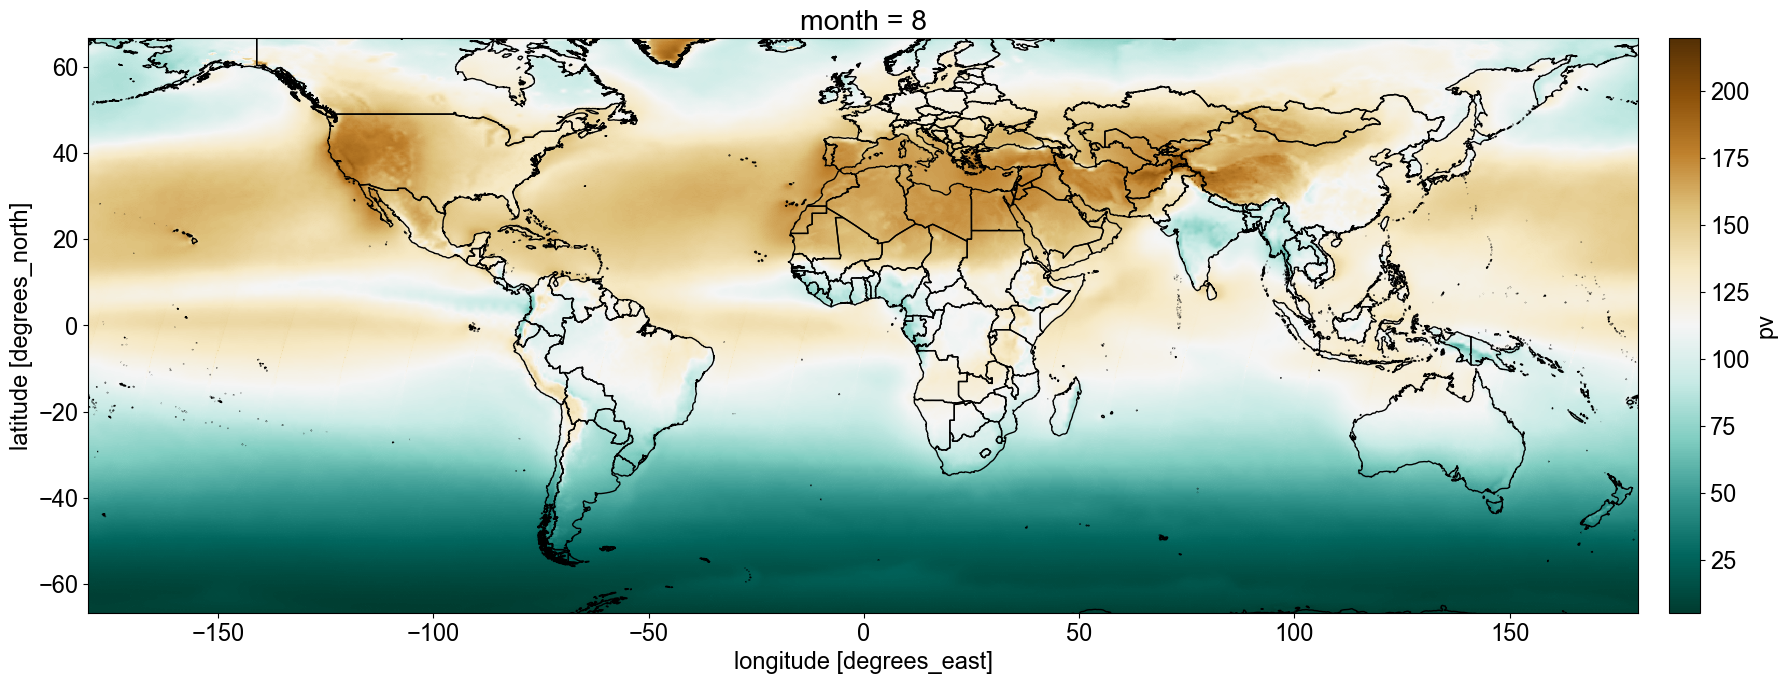

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

cax = ax.inset_axes(bounds=[1.02, 0.0, 0.02, 1])
cbar_kwargs = {'orientation':'vertical', 'cax':cax}

mdata_mth.isel(month=7)['pv'].plot(ax=ax, cmap='BrBG_r', add_colorbar=True, cbar_kwargs=cbar_kwargs)
world.boundary.plot(linewidth=1, color='k', ax=ax)